In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [16]:
def grid(M):
    x = np.zeros(M)
    for i in range(M):
        x[i] = (i / (M - 1) )
    return x
# print(grid(2))
# print(grid(4))

In [5]:
def original_function(x):
    return np.exp(-2*x) * np.cos(4*np.pi*x)

In [21]:
def vx(x, w_m0):
    return np.maximum(0, x + w_m0)

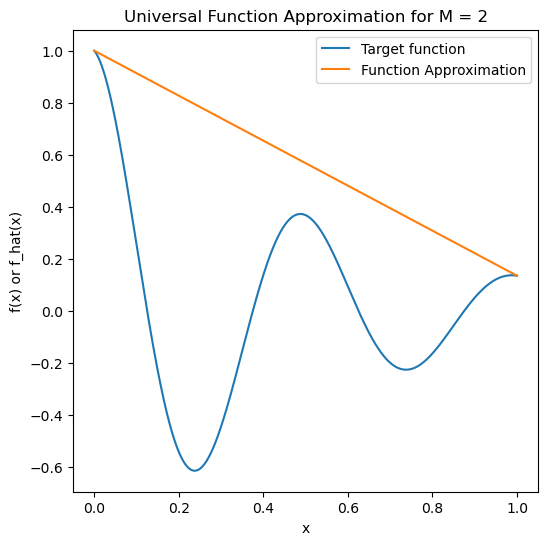

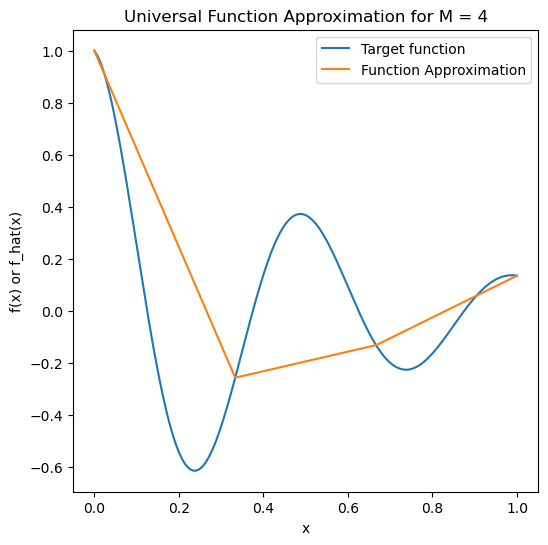

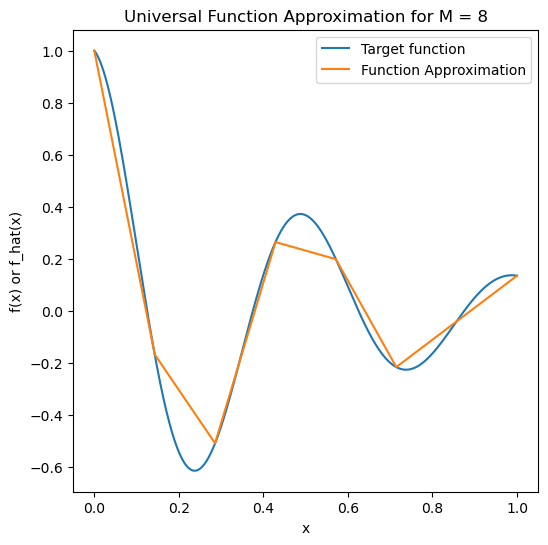

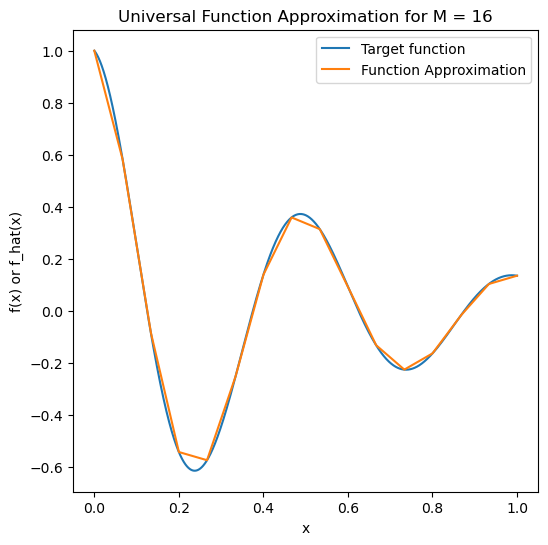

In [48]:
def approximation_function():
    # Range of M
    M_range = [2, 4, 8, 16]

    for M in M_range:
        # define grid for approximated x, y
        x_grid = grid(M)
        y_grid = original_function(x_grid)
        
        # interpolate grid on target function 
        x_range = np.linspace(0, 1, 2000)
        f_hat = np.interp(x_range, x_grid, y_grid)
        
        # plot approximation and target function on same graph for each M
        fig = plt.figure(figsize=(6, 6))
        plt.plot(x_range, original_function(x_range), label = 'Target function')
        plt.plot(x_range, f_hat, label = 'Function Approximation')
        plt.xlabel('x')
        plt.ylabel('f(x) or f_hat(x)')
        plt.title(f'Universal Function Approximation for M = {M}')
        plt.legend()
        plt.show()

approximation_function()

In [36]:
## this function is from Prof. Chugg's nmse_01 notebook
## https://github.com/keithchugg/ee559_spring2023/blob/main/hw_helpers/nmse_01.py

def normalized_mse_01(f, f_hat, x_grid, G=10000):
    # f: target function
    # f_hat: values of f_hat on the grid x_grid on [0,1]
    # x_grid a "coarse" grid on [0,1].  This has M point from the approximation.
    # G: grid size for a fine grid used to approximate the integral.

    x_fine =  np.linspace(0, 1, G)                  # create the fine grid
    f_fine = f(x_fine)                              # evaluate f on the fine grid
    f_hat_fine = np.interp(x_fine, x_grid, f_hat)   # interpolate f_hat to the fine grid
    sq_error = (f_fine - f_hat_fine) ** 2           # compute squared error
    mse = np.mean(sq_error)                         # this is a scalar multiple of the integral (approximately)
    ref = np.mean(f_fine ** 2)                      # Energy in target; off by same scalar as mse
    return mse / ref                                # scalar values cancel 

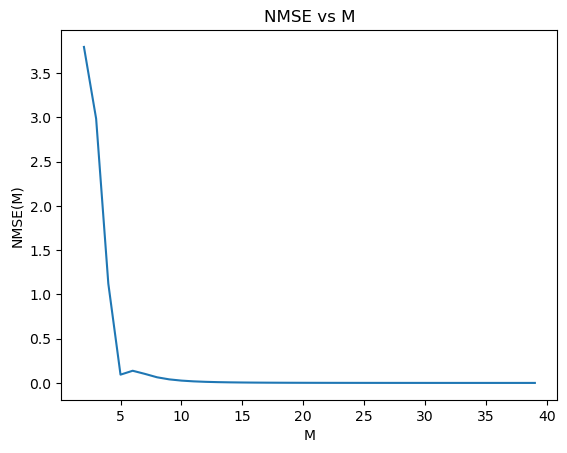

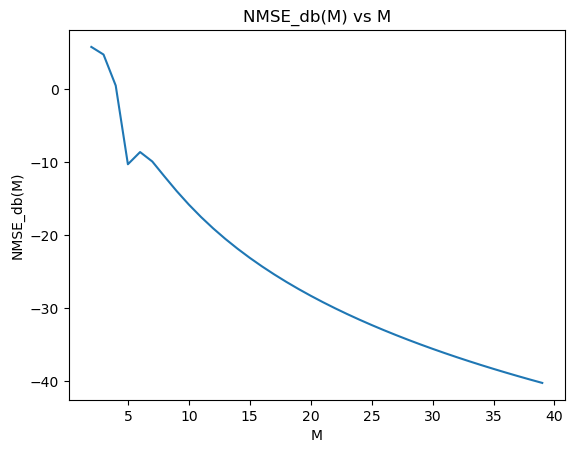

In [59]:
def plot_NMSE():
    # Range of M
    
    res = []
    res_db = []
    M = 2
    M_range = []
    while(M >= 2):
        M_range.append(M)

        # define grid for approximated x, y
        x_grid = grid(M)
        f_hat = original_function(x_grid)

        nmse = normalized_mse_01(original_function, f_hat, x_grid)
        res.append(nmse)
        res_db.append(10 * np.log10(nmse))
        if(10 * np.log10(nmse) < -40):
            break;
        M += 1
    plt.title("NMSE vs M")
    plt.xlabel("M")
    plt.ylabel("NMSE(M)")
    plt.plot(M_range,res)
    plt.show()
    
    plt.title("NMSE_db(M) vs M")
    plt.xlabel("M")
    plt.ylabel("NMSE_db(M)")
    plt.plot(M_range,res_db)
    plt.show()
    
    return res, M_range
    
NMSE, M_range = plot_NMSE()

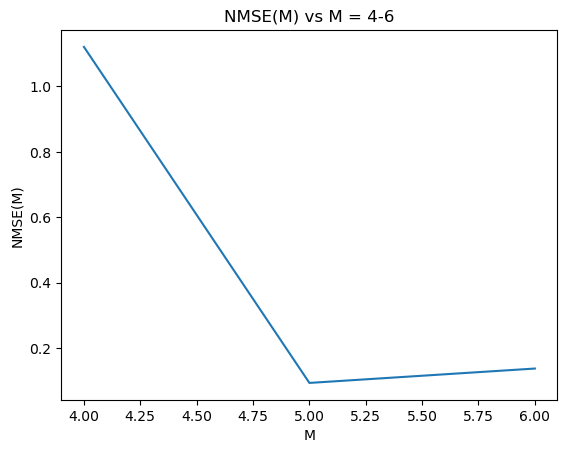

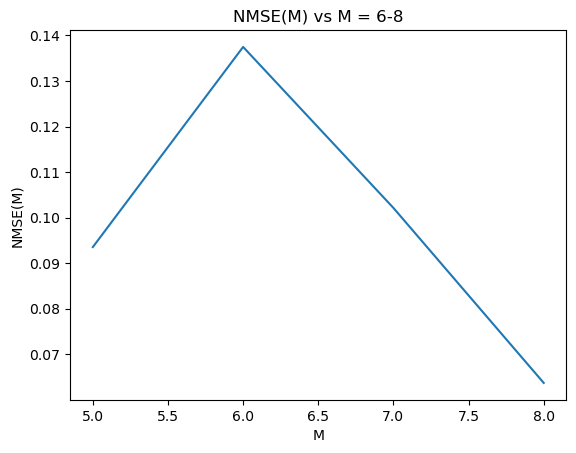

39


In [72]:
plt.title("NMSE(M) vs M = 4-6")
plt.xlabel("M")
plt.ylabel("NMSE(M)")
plt.plot(M_range[2:5], NMSE[2:5])
plt.show()
plt.title("NMSE(M) vs M = 6-8")
plt.xlabel("M")
plt.ylabel("NMSE(M)")
plt.plot(M_range[3:7], NMSE[3:7])
plt.show()
print(M_range[-1])

In [97]:
def derivative(x, h=1e-6):
    return (original_function(x + h) - original_function(x)) / h

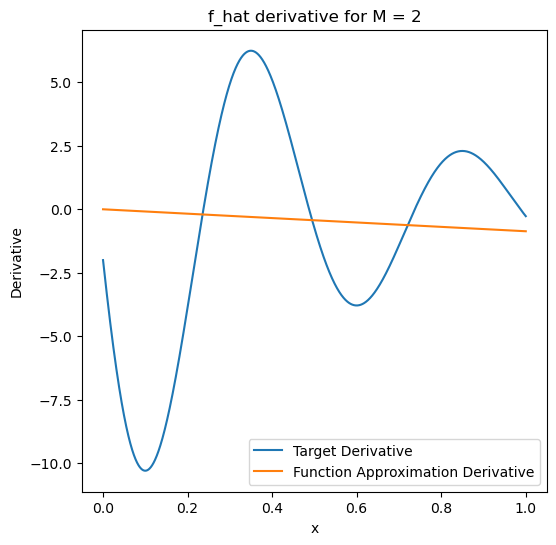

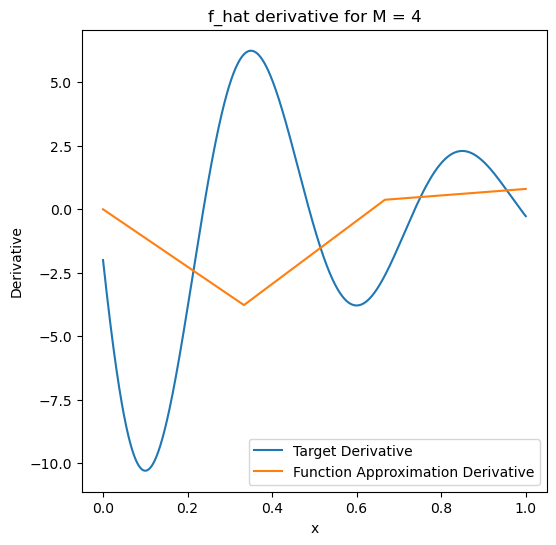

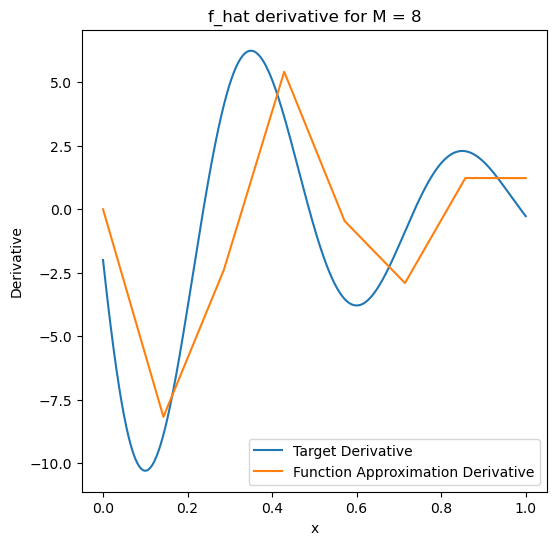

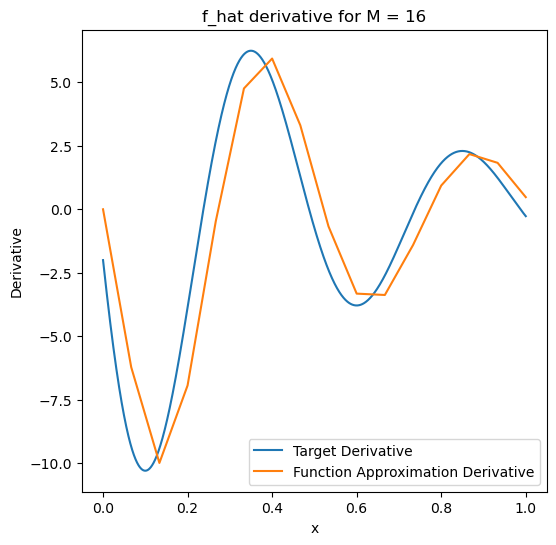

In [98]:
def approximation_derivative_function():
    # Range of M
    M_range = [2, 4, 8, 16]

    for M in M_range:
        # define grid for approximated x, y
        x_grid = grid(M)
        y_grid = original_function(x_grid)
        f_hat_der = [0]
        for i in range(len(x_grid)):
            if(i == 0):
                continue
            f_hat_der.append((y_grid[i] - y_grid[i - 1]) / (x_grid[i] - x_grid[i - 1]))
        

        # Compute derivative on target function 
        x_range = np.linspace(0, 1, 2000)
        y_der = derivative(x_range)
        
#         f_hat = np.interp(x_range, x_grid, y_grid)
        
        # plot approximation and target function on same graph for each M
        fig = plt.figure(figsize=(6, 6))
        plt.plot(x_range,y_der,label = 'Target Derivative')
        plt.plot(x_grid,f_hat_der, label = 'Function Approximation Derivative')
        plt.xlabel('x')
        plt.ylabel('Derivative')
        plt.title(f'f_hat derivative for M = {M}')
        plt.legend()
        plt.show()

approximation_derivative_function()

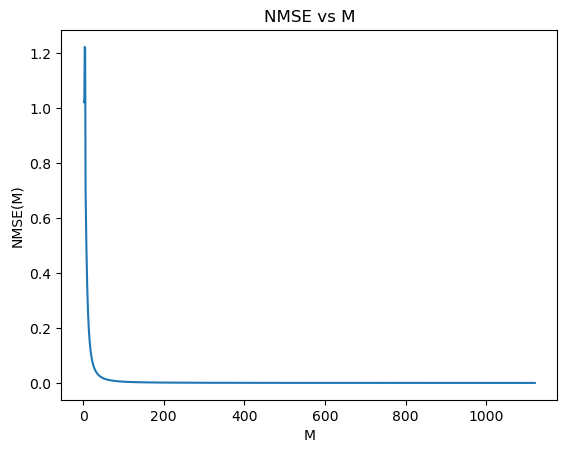

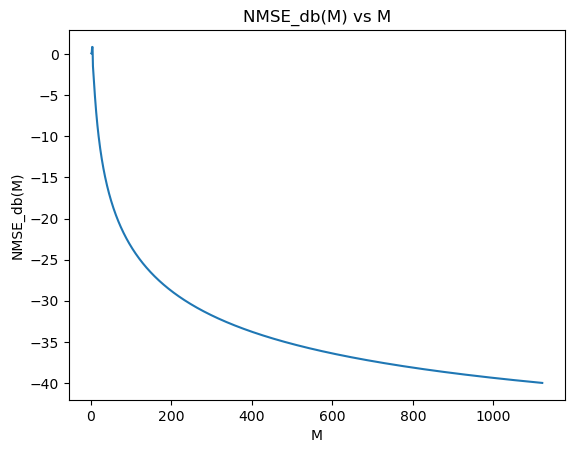

In [100]:
def plot_deri_NMSE():
    # Range of M
    
    res = []
    res_db = []
    M = 2
    M_range = []
    while(M >= 2):
        M_range.append(M)

        # define grid for approximated x, y
        x_grid = grid(M)
        y_grid = original_function(x_grid)
        
        f_hat_der = [0]
        for i in range(len(x_grid)):
            if(i == 0):
                continue
            f_hat_der.append((y_grid[i] - y_grid[i - 1]) / (x_grid[i] - x_grid[i - 1]))
        

        # Compute derivative on target function 
        x_range = np.linspace(0, 1, 2000)
#         y_der = derivative(original_function,x_range)
        
        nmse = normalized_mse_01(derivative, f_hat_der, x_grid)
        res.append(nmse)
        res_db.append(10 * np.log10(nmse))
        if(10 * np.log10(nmse) < -40):
            break;
        M += 1
    plt.title("NMSE vs M")
    plt.xlabel("M")
    plt.ylabel("NMSE(M)")
    plt.plot(M_range,res)
    plt.show()
    
    plt.title("NMSE_db(M) vs M")
    plt.xlabel("M")
    plt.ylabel("NMSE_db(M)")
    plt.plot(M_range,res_db)
    plt.show()
    
    return res, M_range
    
NMSE, M_range = plot_deri_NMSE()